In [1]:
import sympy

sympy.init_printing()

The [Routh-Hurwitz stabilbility criterion](https://en.wikipedia.org/wiki/Routh%E2%80%93Hurwitz_stability_criterion) provides an efficient check of stability for closed loop systems which avoids calculating the roots of a higher-order polynomial.

In [2]:
s = sympy.Symbol('s')

In [3]:
a_0, a_1, a_2, a_3, a_4 = sympy.symbols('a_0:5')
p = a_0 + a_1*s**1 + a_2*s**2 + a_3*s**3 + a_4*s**4

Note that we have to convert the expression above to a `Poly` object to recover all the coefficients.

In [4]:
p = sympy.Poly(p, s)
p

This function constructs the Routh array as given in Seborg.

In [5]:
def routh(p):
    """ Construct the Routh-Hurwitz array given a polynomial in s"""
    coefficients = p.all_coeffs()
    N = len(coefficients)
    M = sympy.zeros(N, (N+1)//2 + 1)

    r1 = coefficients[0::2]
    r2 = coefficients[1::2]
    M[0, :len(r1)] = [r1]
    M[1, :len(r2)] = [r2]
    for i in range(2, N):
        for j in range(N//2):
            S = M[[i-2, i-1], [0, j+1]]
            M[i, j] = sympy.simplify(-S.det()/M[i-1,0])
    return M[:, :-1]

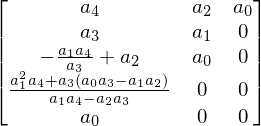

In [6]:
routh(p)